HOME TASK LAB 10


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.0 MB/s eta 0:00:00
Natural Light: 60 lux
Light Adjustment Output: 0.0 %


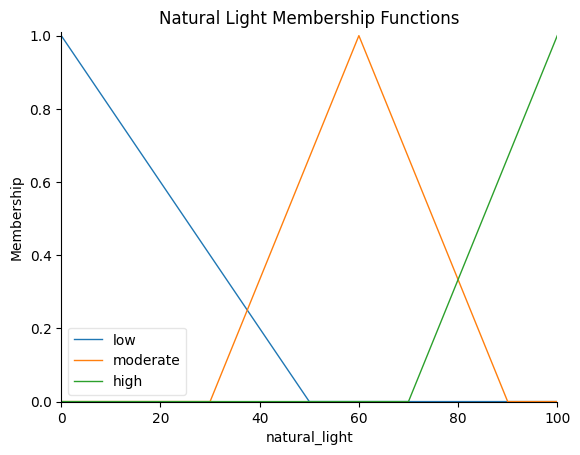

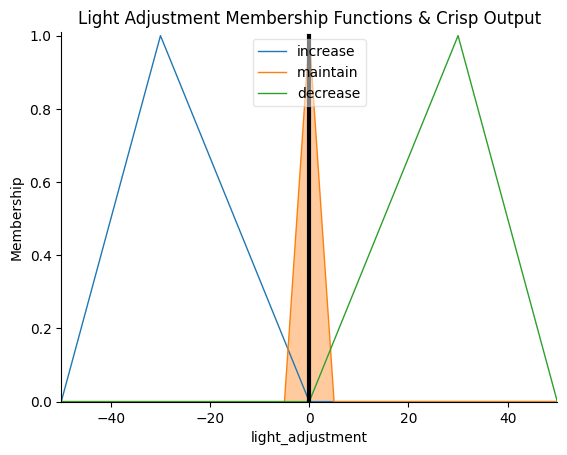

In [1]:
#Home Tasks: 1
#Question #1(Rule Evaluation for Room Light Intensity)
#i.	A smart lighting system adjusts the room light intensity based on the amount of natural light. The rules are:
#ii.	Increase brightness if the natural light is "Low."
#iii.	Maintain brightness if the natural light is "Moderate."
#iv.	Decrease brightness if the natural light is "High."
#v.	For a natural light intensity of 60 lux, determine the rules triggered and compute the fuzzy output of the light adjustment based on these rules.
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# --------- Input Variable: Natural Light (lux) ---------
natural_light = ctrl.Antecedent(np.arange(0, 101, 1), 'natural_light')

# --------- Output Variable: Light Adjustment (%) ---------
light_adjustment = ctrl.Consequent(np.arange(-50, 51, 1), 'light_adjustment')

# --------- Membership Functions (Input) ---------
natural_light['low'] = fuzz.trimf(natural_light.universe, [0, 0, 50])
natural_light['moderate'] = fuzz.trimf(natural_light.universe, [30, 60, 90])
natural_light['high'] = fuzz.trimf(natural_light.universe, [70, 100, 100])

# --------- Membership Functions (Output) ---------
light_adjustment['increase'] = fuzz.trimf(light_adjustment.universe, [-50, -30, 0])
light_adjustment['maintain'] = fuzz.trimf(light_adjustment.universe, [-5, 0, 5])
light_adjustment['decrease'] = fuzz.trimf(light_adjustment.universe, [0, 30, 50])

# --------- Rules ---------
rule1 = ctrl.Rule(natural_light['low'], light_adjustment['increase'])
rule2 = ctrl.Rule(natural_light['moderate'], light_adjustment['maintain'])
rule3 = ctrl.Rule(natural_light['high'], light_adjustment['decrease'])

# --------- Control System ---------
lighting_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
lighting_sim = ctrl.ControlSystemSimulation(lighting_ctrl)

# --------- Input Value ---------
lighting_sim.input['natural_light'] = 60
lighting_sim.compute()

# --------- Output ---------
print("Natural Light:", 60, "lux")
print("Light Adjustment Output:", round(lighting_sim.output['light_adjustment'], 2), "%")

# --------- Plots ---------
natural_light.view()
plt.title("Natural Light Membership Functions")

light_adjustment.view(sim=lighting_sim)
plt.title("Light Adjustment Membership Functions & Crisp Output")

plt.show()



Dough Thickness: 2.5 cm
Oven Temperature: 220 °C
Crisp Baking Time: 13.0 minutes


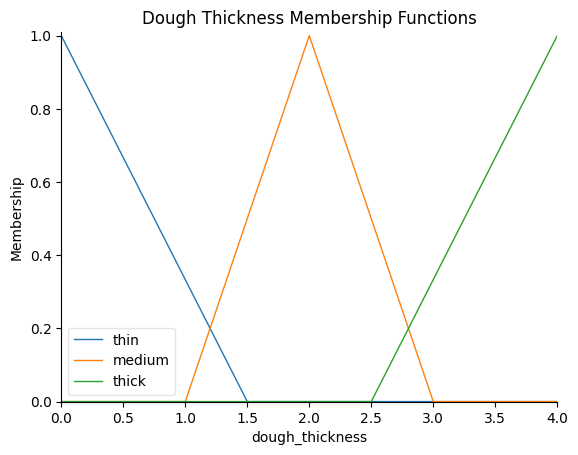

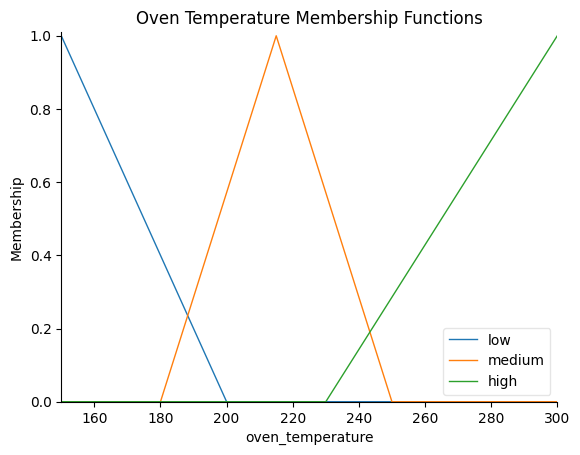

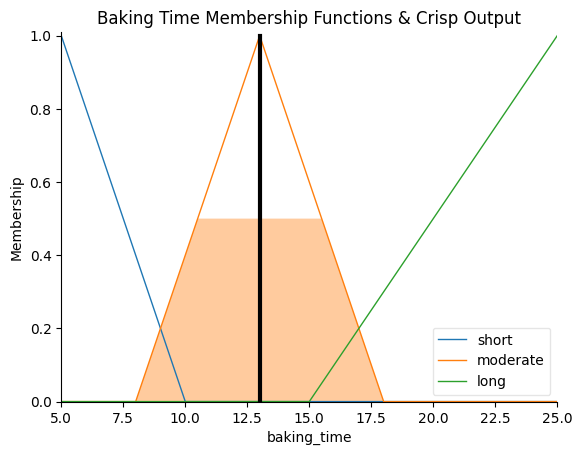

In [2]:
#HOME TASK 2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# ---------- Input Variables ----------
dough = ctrl.Antecedent(np.arange(0, 4.1, 0.1), 'dough_thickness')
temp = ctrl.Antecedent(np.arange(150, 301, 1), 'oven_temperature')

# ---------- Output Variable ----------
bake_time = ctrl.Consequent(np.arange(5, 26, 1), 'baking_time')

# ---------- Membership Functions ----------
# Dough Thickness
dough['thin'] = fuzz.trimf(dough.universe, [0, 0, 1.5])
dough['medium'] = fuzz.trimf(dough.universe, [1, 2, 3])
dough['thick'] = fuzz.trimf(dough.universe, [2.5, 4, 4])

# Oven Temperature
temp['low'] = fuzz.trimf(temp.universe, [150, 150, 200])
temp['medium'] = fuzz.trimf(temp.universe, [180, 215, 250])
temp['high'] = fuzz.trimf(temp.universe, [230, 300, 300])

# Baking Time
bake_time['short'] = fuzz.trimf(bake_time.universe, [5, 5, 10])
bake_time['moderate'] = fuzz.trimf(bake_time.universe, [8, 13, 18])
bake_time['long'] = fuzz.trimf(bake_time.universe, [15, 25, 25])

# ---------- Rules ----------
rule1 = ctrl.Rule(dough['thick'] & temp['low'], bake_time['long'])
rule2 = ctrl.Rule(dough['medium'] & temp['medium'], bake_time['moderate'])
rule3 = ctrl.Rule(dough['thin'] & temp['high'], bake_time['short'])

# ---------- Control System ----------
baking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
baking_sim = ctrl.ControlSystemSimulation(baking_ctrl)

# ---------- Inputs ----------
baking_sim.input['dough_thickness'] = 2.5
baking_sim.input['oven_temperature'] = 220

baking_sim.compute()

# ---------- Output ----------
print("Dough Thickness:", 2.5, "cm")
print("Oven Temperature:", 220, "°C")
print("Crisp Baking Time:", round(baking_sim.output['baking_time'], 2), "minutes")

# ---------- Plots ----------
dough.view()
plt.title("Dough Thickness Membership Functions")

temp.view()
plt.title("Oven Temperature Membership Functions")

bake_time.view(sim=baking_sim)
plt.title("Baking Time Membership Functions & Crisp Output")

plt.show()
